# Module importieren

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [3]:
data = pd.read_parquet('https://github.com/Immobilienrechner-Challenge/data/blob/main/immo_data_202208_v2.parquet?raw=true')
data.head()

,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,url,table,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,Biberstein,100 m²,None,None,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5023.0,NaN,None,None,NaN
1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,https://www.immoscout24.ch//en/d/terrace-house...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5023.0,NaN,None,None,NaN
2,None,None,None,None,None,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",https://www.immoscout24.ch//en/d/penthouse-buy...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5022.0,NaN,None,None,NaN
3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,https://www.immoscout24.ch//en/d/detached-hous...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5023.0,NaN,None,None,NaN
4,Küttigen,142 m²,None,None,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,https://www.immoscout24.ch//en/d/flat-buy-romb...,b <article class=####Box-cYFBPY hKrxoH####><h2...,...,None,None,None,NaN,None,5022.0,NaN,None,None,NaN


# Get missing values ratio

The higher the values in "missing_value_ratio" the more Na values are in the column.  
1 means that the column is completely empty.  
0 means that the column is completely filled.

In [4]:
# calculate from each column the percentage of missing values and create a dataframe
missing_values = data.isnull().sum().sort_values(ascending=False)/len(data) 

# create a dataframe with the missing values
missing_values = pd.DataFrame(missing_values, columns=['missing_value ratio'])

missing_values

,missing_value ratio
Minimum floor space:,0.999911
Superficie utile,0.999733
Gross return,0.999733
Piano,0.999555
Superficie del terreno,0.999511
...,...
gde_workers_sector2,0.000000
gde_workers_sector3,0.000000
gde_workers_total,0.000000
Zip,0.000000


In [14]:
# select all columns that contains "merged"
data_merged = data[data.filter(regex='merged', axis=1).columns]
# display data_merged
display("Dataframe that contains \"merged\" in the column name", data_merged.head())

# get the number of missing values for each column
missing_values_merged = data_merged.isnull().sum().sort_values(ascending=False)/len(data_merged)
display("Number of missing values for each column", missing_values_merged)


# select all columns that contains "unified"
data_unified = data[data.filter(regex='unified', axis=1).columns]
# display data_unified
display("Dataframe that contains \"unified\" in the column name", data_unified.head())

# get the number of missing values for each column
missing_values_unified = data_unified.isnull().sum().sort_values(ascending=False)/len(data_unified)
display("Number of missing values for each column", missing_values_unified)


'Dataframe that contains "merged" in the column name'

,Municipality_merged,Floor_merged,Living_space_merged,Floor_space_merged,Plot_area_merged,Availability_merged
0,Biberstein,4. floor,100 m²,None,None,On request
1,Biberstein,None,156 m²,242 m²,222 m²,On request
2,None,None,None,None,None,None
3,Biberstein,None,154 m²,257 m²,370 m²,On request
4,Küttigen,Ground floor,142 m²,None,None,On request


'Number of missing values for each column'

Floor_space_merged     0.873805
Plot_area_merged       0.787287
Floor_merged           0.759486
Living_space_merged    0.472755
Municipality_merged    0.436191
Availability_merged    0.426360
dtype: float64

'Dataframe that contains "unified" in the column name'

,type_unified,Floor_unified,Plot_area_unified,Living_area_unified
0,penthouse,4,NaN,100.0
1,terrace-house,None,222.0,156.0
2,penthouse,None,NaN,NaN
3,detached-house,None,370.0,154.0
4,flat,GF,NaN,142.0


'Number of missing values for each column'

Floor_unified          0.763890
Plot_area_unified      0.646235
Living_area_unified    0.066812
type_unified           0.000000
dtype: float64

**type_unified** kann verwendet werden fuer die Klassifikations Aufgaben  
**Living_area_unified** kann ebenfalls verwendet werden fuer die simplen Linearen Regression  




# type_unified 

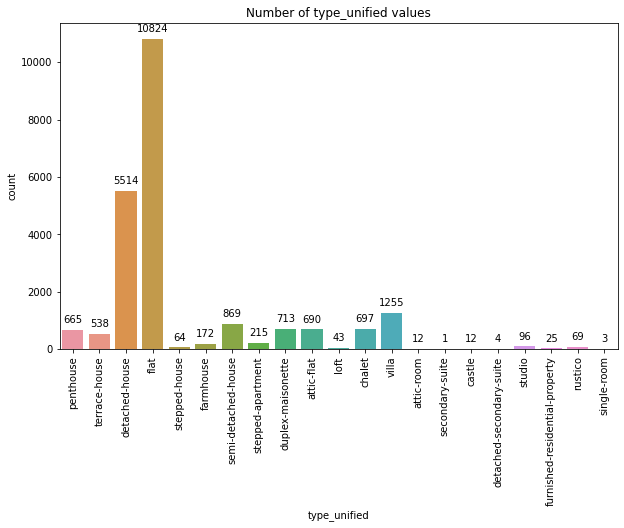

In [30]:
# Get unique values
sorted(data["type_unified"].unique())

# create barplot with number of type_unified values
plt.figure(figsize=(10,6))
ax = sns.countplot(x="type_unified", data=data)
# rotate x axis labels
plt.xticks(rotation=90)
# add numbers to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# add title 
plt.title("Number of type_unified values")
plt.show()


# Price

In [34]:
# get all columns that contains "price" 
data_price = data[data.filter(regex='price', axis=1).columns]
# display data_price
display("Dataframe that contains \"price\" in the column name", data_price.head())

# get the number of missing values for each column
missing_values_price = data_price.isna().sum().sort_values(ascending=False)/len(data_price)
display("Number of missing values for each column", missing_values_price)


'Dataframe that contains "price" in the column name'

,price,price_cleaned,price_s
0,"CHF 1,150,000.—",1150000.0,None
1,"CHF 1,420,000.—",1420000.0,None
2,"CHF 720,000.—",720000.0,None
3,"CHF 1,430,000.—",1430000.0,None
4,"CHF 995,000.—",995000.0,None


'Number of missing values for each column'

price_s          0.594057
price_cleaned    0.045149
price            0.000000
dtype: float64

the columns price is completely filled with values, but somehow price_cleaned columns has 4.5 % missing values?

In [37]:
# get all index in price_cleaned that contains NaN
index_price_cleaned = data_price[data_price["price_cleaned"].isna()]
# display index_price_cleaned
display("Index of price_cleaned that contains NaN", index_price_cleaned)

# get index of price_cleaned that contains NaN

'Index of price_cleaned that contains NaN'

,price,price_cleaned,price_s
21,Price on request,NaN,None
27,Price on request,NaN,None
28,Price on request,NaN,None
29,Price on request,NaN,None
33,Price on request,NaN,None
...,...,...,...
13274,Price on request,NaN,None
13288,Price on request,NaN,None
13290,Price on request,NaN,None
13299,Price on request,NaN,None


# Dropping Columns that are not needed

In [62]:
# starting to drop unnecessary columns
drop_list = ["Municipality", "Living space", "Plot area", "Floor space", "Availability",
             "location", "description", "detailed_description", "url", "table", "Floor",
             "detail_responsive#municipality", "detail_responsive#floor", "detail_responsive#floor",
             "detail_responsive#available_from", "Gemeinde", "Wohnfläche", "Stockwerk", "Nutzfläche",
             "detail_responsive#surface_living", "Verfügbarkeit", "Grundstücksfläche", "detail_responsive#surface_property",
             "detail_responsive#surface_usable", "Commune", "Surface habitable", "Surface du terrain",
             "Surface utile", "Disponibilité", "Étage", "Comune", "Superficie abitabile", "Disponibilità",
             "Gross return", "Piano", "Superficie del terreno", "Superficie utile", "Municipality_merged",
             "Floor_merged", 'Living_space_merged', 'Floor_space_merged', 'Plot_area_merged', 'Availability_merged',
             'location_parsed', 'title', 'details', 'address', 'link', 'details_structured', 'lat',
             'lon', 'index', 'Latitude', 'Locality', 'Longitude', 'Minimum floor space:', 'Gross yield:', 'Number of toilets:',
             'Room height:', 'Number of apartments:', 'Volume:', 'Last refurbishment:', 'Number of floors:', 'Floor space:',
             'Land area:', 'Floor_unified', 'Year built:', 'Plot_area_unified', 'features', 'No. of rooms:', 'space_cleaned', 'description_detailed',
             'Surface living:', 'address_s', 'price_s', 'space', 'price']
            
# copy data to new dataframe
data_new = data.copy()

# drop columns from drop_list
data_new.drop(drop_list, axis=1, inplace=True)

# display data_new
display("Dataframe after dropping unnecessary columns", data_new.head())

# get number of missing values for each column
missing_values_new = data_new.isna().sum().sort_values(ascending=False)/len(data_new)
display("Number of missing values for each column", missing_values_new.head())


'Dataframe after dropping unnecessary columns'

,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,NoisePollutionRoadM,NoisePollutionRoadS,PopulationDensityL,...,gde_workers_total,price_cleaned,type,Space extracted,rooms,plz_parsed,type_unified,Living_area_unified,provider,plz
0,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,331.0,1150000.0,penthouse,100.0,5.0,5023.0,penthouse,100.0,Immoscout24.ch,5023.0
1,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,331.0,1420000.0,terrace-house,156.0,5.0,5023.0,terrace-house,156.0,Immoscout24.ch,5023.0
2,0.163362,0.095877,0.001911,0.0,0.0,0.0,0.334957,0.381257,0.297575,0.325887,...,33493.0,720000.0,penthouse,NaN,5.0,5022.0,penthouse,NaN,Immoscout24.ch,5022.0
3,0.511176,0.286451,0.090908,0.0,0.0,0.0,0.058298,0.067048,0.103850,0.092914,...,331.0,1430000.0,detached-house,154.0,5.0,5023.0,detached-house,154.0,Immoscout24.ch,5023.0
4,0.333865,0.279276,0.145835,0.0,0.0,0.0,0.133498,0.132933,0.235917,0.190986,...,1355.0,995000.0,flat,142.0,5.0,5022.0,flat,142.0,Immoscout24.ch,5022.0


'Number of missing values for each column'

gde_politics_pda       0.481607
gde_politics_bdp       0.390552
gde_politics_rights    0.297184
gde_politics_glp       0.259775
gde_politics_evp       0.189004
dtype: float64